In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [45]:
# from google.colab import drive
# drive.mount('/content/drive')
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
# tammpilkan 3 baris pertama
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [48]:
# ubah namma kolom
df = df.rename(columns={'CustomerID': 'ID', 'Gender': 'gender', 'Age': 'usia',
                        'Annual Income (k$)': 'pendapatan tahunan (juta)',
                        'Spending Score (1-100)': 'skor pengeluaran (1-100)'})
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], ['L','P'], inplace=True)
# tampilkan data yang sudah di preprocess
df.head(20)

,ID,gender,usia,pendapatan tahunan (juta),skor pengeluaran (1-100)
0,1,P,19,15,39
1,2,P,21,15,81
2,3,L,20,16,6
3,4,L,23,16,77
4,5,L,31,17,40
5,6,L,22,17,76
6,7,L,35,18,6
7,8,L,23,18,94
8,9,P,64,19,3
9,10,L,30,19,72


In [75]:
from sklearn.cluster import KMeans
# menghilangkan kolom customer id dan gender
X = df.drop(['ID', 'gender', 'usia'], axis=1)
X = X.sample(n=11)
# X = X.tail(20)
print(df)
print(X)
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

      ID gender  usia  pendapatan tahunan (juta)  skor pengeluaran (1-100)
0      1      P    19                         15                        39
1      2      P    21                         15                        81
2      3      L    20                         16                         6
3      4      L    23                         16                        77
4      5      L    31                         17                        40
..   ...    ...   ...                        ...                       ...
195  196      L    35                        120                        79
196  197      L    45                        126                        28
197  198      P    32                        126                        74
198  199      P    32                        137                        18
199  200      P    30                        137                        83

[200 rows x 5 columns]
     pendapatan tahunan (juta)  skor pengeluaran (1-100)
27                 

Text(0, 0.5, 'Inertia')

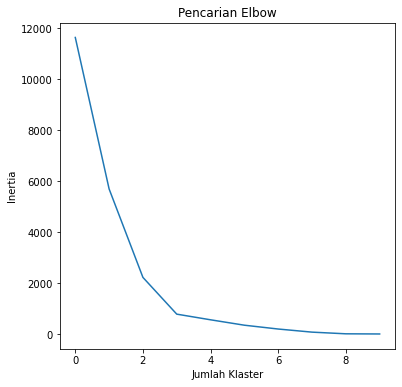

In [81]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(x=list(range(0, 10)), y=clusters, ax=ax)
ax.set_title('Pencarian Elbow')
ax.set_xlabel('Jumlah Klaster')
ax.set_ylabel('Inertia')

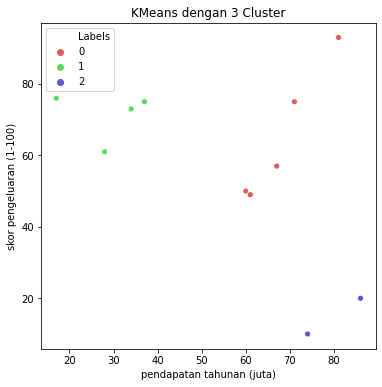

In [82]:
# membuat objek KMeans
km5 = KMeans(n_clusters=3).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(6,6))
sns.scatterplot(X['pendapatan tahunan (juta)'], X['skor pengeluaran (1-100)'], hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan 3 Cluster')
plt.show()